# Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

# What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries.

# What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


This dataset gives us the information about the world happiness data. we can see various factors that affect the happiness score of the particular country.

# Exploratory Data Analysis (EDA)

In [4]:
df.shape

(158, 12)

the dataset contains 158 rows and 12 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

The dataset does not contain any null value and there are mainly 3 datatypes present in this dataset i.e., float,int and object.

In [7]:

df=df.drop(['Country','Region','Happiness Rank'],axis=1)
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


We have observed that Happiness rank, Country and Region will not play the major role to predit the target 'Happiness Score' so we have deleted this column.

In [8]:
df.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Now all the dataset have float datatypes so we can easily aplly regression analysis on this dataset.
The differnce between 75% and max is not much

In [9]:
df.isnull().sum()

Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

The dataset does not contain any null values

In [10]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

We have observed here that some headings contain positive skeweness. we will work upn them to remove there positive skewness

In [11]:
df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


after checking correlation of this dataset, we can see Standard error is negatively correlate with our target variable. all the other features having positive correlation with our label. we will also cross check the same with heatmap method.

<function matplotlib.pyplot.show(close=None, block=None)>

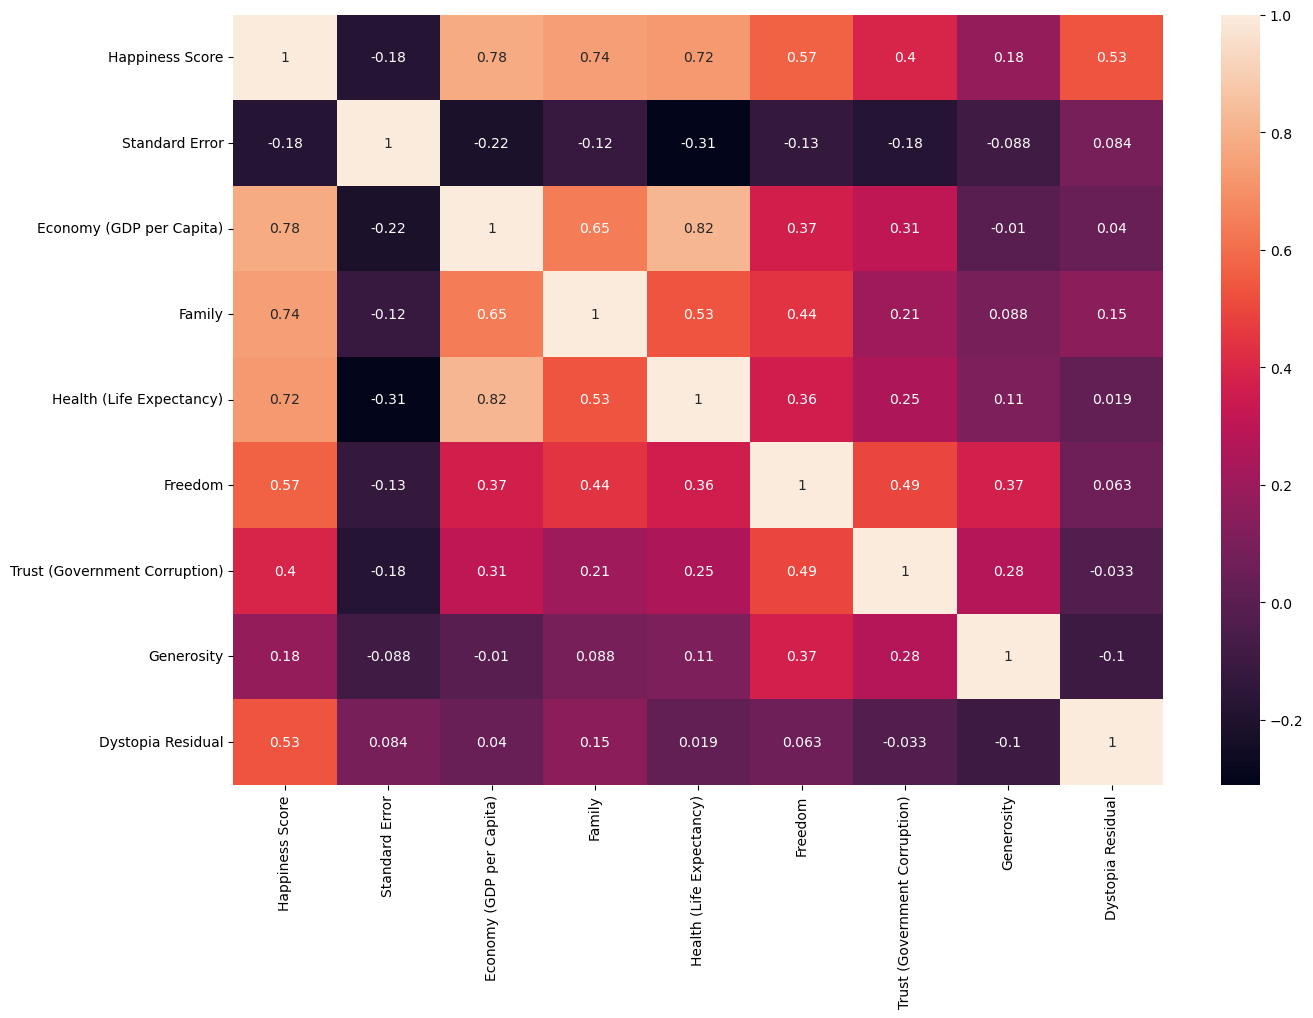

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show

it is also shown with above heat map that our target variable ia negatively correlate with Standard error.

Happiness Score                     Axes(0.125,0.653529;0.227941x0.226471)
Standard Error                   Axes(0.398529,0.653529;0.227941x0.226471)
Economy (GDP per Capita)         Axes(0.672059,0.653529;0.227941x0.226471)
Family                              Axes(0.125,0.381765;0.227941x0.226471)
Health (Life Expectancy)         Axes(0.398529,0.381765;0.227941x0.226471)
Freedom                          Axes(0.672059,0.381765;0.227941x0.226471)
Trust (Government Corruption)           Axes(0.125,0.11;0.227941x0.226471)
Generosity                           Axes(0.398529,0.11;0.227941x0.226471)
Dystopia Residual                    Axes(0.672059,0.11;0.227941x0.226471)
dtype: object

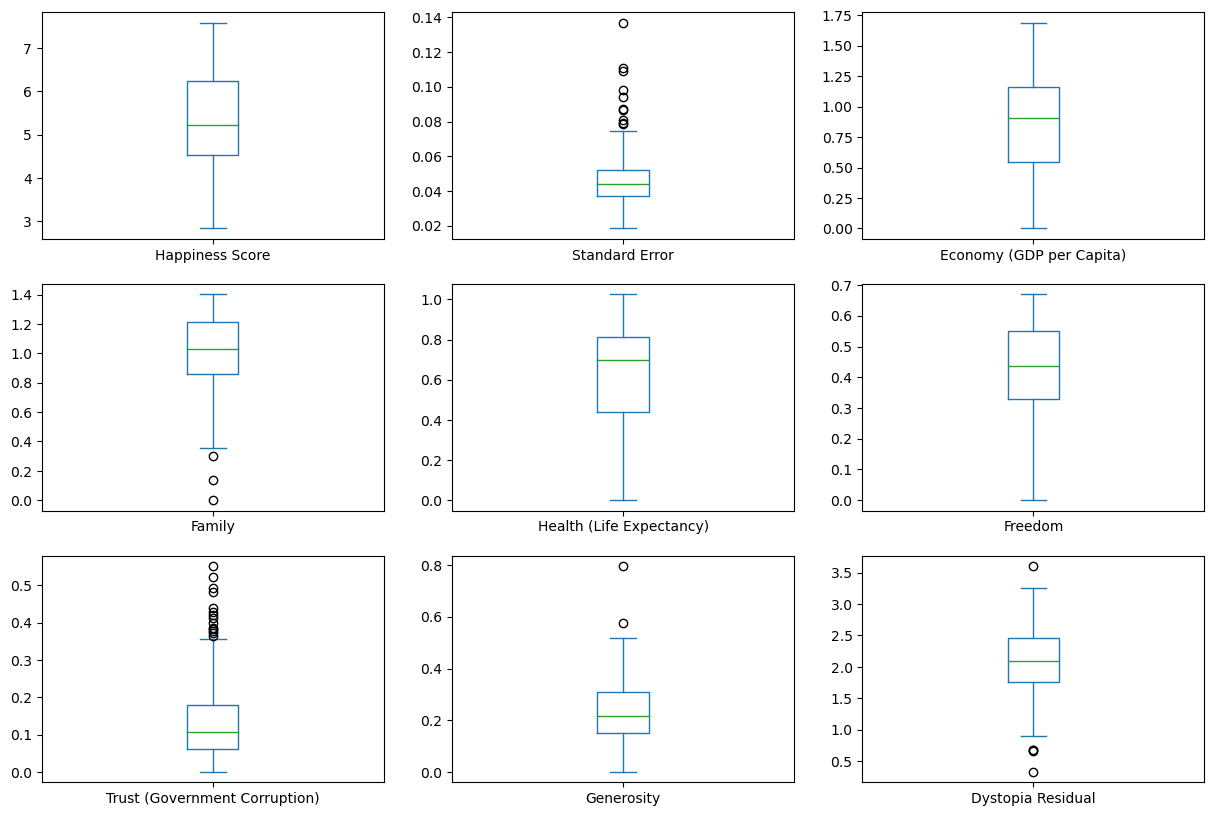

In [13]:
# checking for outliers in the dataset with the help of boxplot
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(15,10))

It is clearly shown with above visualization there is outliers present in Standard error and Trust (Government Corruption)

In [14]:
# Now we will standardize the dataset with zscore technique.
from scipy.stats import zscore

In [15]:
z=np.abs(zscore(df))
threashold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [16]:
z

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.937360,0.805926,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258
1,1.914581,0.055889,1.135226,1.514458,1.289434,1.332456,0.016480,1.575856,1.092857
2,1.884792,0.854487,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335
3,1.880411,0.531526,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893
4,1.797179,0.722845,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...
153,1.674055,0.774917,1.552987,0.800520,0.818610,1.087740,3.413922,0.087228,2.588925
154,1.783571,0.662582,1.392303,2.346860,1.263362,0.372033,0.529210,0.433117,0.843967
155,2.076199,0.132534,0.455245,1.901086,0.372199,1.809238,0.381419,1.856891,3.208430
156,2.164688,2.263962,2.067566,2.118467,1.649648,2.064472,0.357715,0.316950,0.481985


In [17]:
df=df[(z<3).all(axis=1)]
df.head()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [18]:
# Data Standardization with Standard Scaler and transform the data

from sklearn.preprocessing import StandardScaler

In [19]:
Scaler=StandardScaler()

In [20]:
# Fit the data on Standard Scaler

Scaler.fit_transform(df)

array([[ 1.94794451, -0.86678606,  1.38191593, ...,  2.47225453,
         0.54630526,  0.7568764 ],
       [ 1.92446866,  0.18566863,  1.13832385, ...,  0.00924715,
         1.71389767,  1.10929978],
       [ 1.89376946, -0.92608935,  1.19821973, ...,  3.03674718,
         0.91963022,  0.70850719],
       ...,
       [-1.67456049, -1.10042671, -1.40259581, ..., -0.38241996,
         1.11805063, -0.32213507],
       [-1.8867461 , -0.69173419, -1.48837933, ..., -0.53365337,
        -0.40922585, -0.9307015 ],
       [-2.27951521,  2.88218185, -2.19013866, ..., -0.35206708,
        -0.28645792, -0.54943602]])

In [21]:
df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
150,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [22]:
# Checking Data loss
Data_Loss=(158-149)/158*100
Data_Loss

5.69620253164557

Our Data Loss in 5.69%

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [25]:
X= df.drop('Happiness Score',axis=1)
Y=df['Happiness Score']

# Creating the training and testing data sets

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
# Pass the data for splitting into 04 Parts
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=213)

I am taking 25 percent of the complete dataset for training purpose and the remaing 75 percent with be used to train the model.

In [27]:
X_train.shape


(111, 8)

In [28]:
Y_train.shape

(111,)

In [29]:
X_test.shape

(38, 8)

In [30]:
Y_test.shape

(38,)

# Machine Learning Algorithm

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


### Finding Best Random State

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.9999999506659051 on Random_state 8


# LinearRegression

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted result :\n', y_pred)
print('\n')
print('actual result\n',Y_test)

Predicted result :
 [4.87419511 5.58861787 6.50511258 5.828251   3.95555703 4.79951491
 6.7862639  6.94022127 3.89644172 4.41922827 3.65590095 6.26926118
 3.90368817 5.68873293 3.68080671 5.26797655 3.84495376 6.57507451
 5.81250097 4.2924686  7.28400428 6.9373781  4.71473871 7.19985885
 4.43551749 4.27062259 4.95935121 5.36029411 3.57456514 2.90444958
 4.8844401  5.07326945 4.36910684 4.51699392 3.78070892 3.58679949
 4.78788571 4.87596886 4.89746709 6.32893357 5.05714357 4.94865197
 4.86710255 7.52703055 7.37813591 4.8575196  7.22575833 4.03295365
 6.13016147 6.85297995]


actual result
 99     4.874
68     5.589
30     6.505
56     5.828
139    3.956
103    4.800
24     6.786
17     6.940
142    3.896
124    4.419
149    3.656
39     6.269
141    3.904
66     5.689
146    3.681
77     5.268
143    3.845
28     6.575
58     5.813
130    4.292
9      7.284
18     6.937
107    4.715
12     7.200
123    4.436
131    4.271
94     4.959
74     5.360
152    3.575
156    2.905
97     4.885


# LinearRegression Evaluation Matrix

In [34]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 Error :
Mean absolute error : 0.0002494400928736162
Mean squared error : 8.959718338292555e-08
Root Mean Squared Error: 0.00029932788607633194


 R2 Score :
0.9999999383751429


# Random Forest Regressor Model

In [35]:
rf = RandomForestRegressor(n_estimators = 150 )
svr=SVR()
dtc = DecisionTreeRegressor()
ad=AdaBoostRegressor()

model = [rf,svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
                                            
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('\n')

 Error of  RandomForestRegressor(n_estimators=150) :
Mean absolute error : 0.27880119999999997
Mean squared error : 0.1279558192293331
Root Mean Squared Error: 0.35770912656700987


 R2 Score :
0.9119921097934922


 Error of  SVR() :
Mean absolute error : 0.10419216048628474
Mean squared error : 0.019485953969960303
Root Mean Squared Error: 0.13959209852266102


 R2 Score :
0.9865975794779313


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.3723
Mean squared error : 0.24529094000000004
Root Mean Squared Error: 0.49526855341319626


 R2 Score :
0.8312891258389734


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.33068811381661495
Mean squared error : 0.17419879345605416
Root Mean Squared Error: 0.41737128968827525


 R2 Score :
0.8801862363046633




 Linear Regression Model Gives maximum R2 Score

# Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, Y, cv = 5)
print('\033[1m'+'Cross Validation Score :'+'\033[0m\n')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Std deviation :",score.std())

Cross Validation Score :

Score : [0.99999943 0.99999847 0.99999831 0.99999509 0.99999933]
Mean Score : 0.9999981234686345
Std deviation : 1.5837827108856898e-06


# Saving Model

In [37]:
import joblib
joblib.dump(lin_reg,'lin_reg.obj')

['lin_reg.obj']

Lastly saving the model